# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Feb 2nd, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Manish Kumar

Student ID: 1009645840

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). Download it using the cell below:

In [ ]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt
dataset = load_diabetes()

## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 10
* Determine the median target value. 140.5
* How many participants have a target value greater than the median target value? 221

Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as "diabetes severity below median" or "diabetes severity above median". **[0.5]**

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Creating variables for features array and targets
feature_data = dataset.data
feature_names_dataset = dataset.feature_names
target_data = dataset.target


# Creating pandas dataframe containing the data and corresponding targets
df = pd.DataFrame(data= feature_data, columns=feature_names_dataset)
df['target'] = dataset.target


# Calculating number of features, median target value and participants having 
# target value greater than the median target value
num_features = feature_data.shape[1]
median_target = np.median(target_data)
median_greater_target = np.sum(target_data>=median_target)
print("No. of features in dataset = ", num_features)
print("Median of target values =", median_target)
print("Participants having target value greater than the median target value =",
      median_greater_target)


# Alternate ways to calculate median target and target values greater than
# median using pandas dataframe object
median_target_alt = df["target"].median()
median_greater_target_alt = df["target"][df["target"]>median_target].count()  


# Adding an additional column containing either 0 (if the target value is below 
# the median) or 1 (if the target value is above the median)
df['new_target'] = df["target"].gt(median_target).astype(int)


# Split the dataset into a train and a test set in "70:30" ratio
new_target_data = df['new_target']
X_train, X_test, y_train, y_test = train_test_split(feature_data, new_target_data, 
                                                    test_size=0.3, 
                                                    random_state=0)

No. of features in dataset =  10
Median of target values = 140.5
Participants having target value greater than the median target value = 221


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``age``, the y-axis is ``bmi,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**


**Answers**

---

As can be seen the graphs below, the only difference in two graphs is the 'scaling factor'. The distribution of the graphs is same because the dataset 'load_diabetes' has already been standardized.

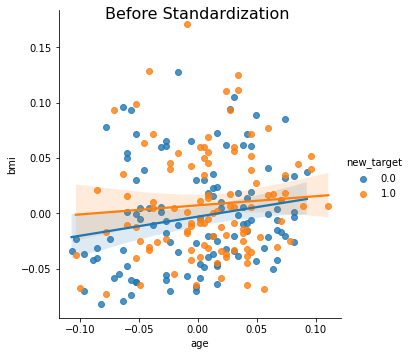

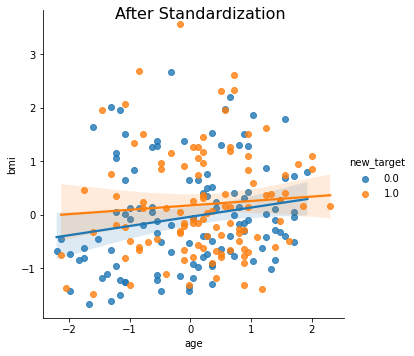

In [ ]:
import seaborn as sb
from sklearn.preprocessing import StandardScaler


#Getting the index value of age and bmi feature
age_colm_idx = df.columns.get_loc('age')
bmi_colm_idx = df.columns.get_loc('bmi')


# Normalizing the feature vector age and bmi
scaler = StandardScaler()
X_train_sb = X_train[:, [age_colm_idx, bmi_colm_idx]]
scaler.fit(X_train_sb)
X_train_norm = scaler.transform(X_train_sb)


# Creating new reduced pandas dataframes and adding targets columns
df_red_sb       = pd.DataFrame(data= X_train_sb, columns=['age', 'bmi'])
df_red_sb_norm  = pd.DataFrame(data= X_train_norm, columns=['age', 'bmi'])
df_red_sb['new_target']       = y_train
df_red_sb_norm['new_target']  = y_train


# Plotting before and after standardizaion plots
fig1 = sb.lmplot(data=df_red_sb, x='age', y='bmi', hue='new_target');
fig1.fig.suptitle("Before Standardization", fontsize = 16);

fig2 = sb.lmplot(data=df_red_sb_norm, x='age', y='bmi', hue='new_target');
fig2.fig.suptitle("After Standardization", fontsize = 16);

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a diabetes severity that is less than the median or greater than the median. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**

3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**


**Answers**

---

2. Best `K` is 15 and highest cross-validation accuracy is 75.43%.

3. From the graph 'Mean cross-validation accuracy of training set and validation set Vs K' below, range of `K` leading to overfit is  `[1 12]`approximately as the error between training set and the validation set is very high. Similarly, range of `K` leading to underfitting is `[45 100]` approximately, as the accuracy of the validation set accuracy and the training  almost become similar. Further at about K=55, the validation set accuracy is more than training set indicating the underfitting.



  





Best K is 15
The highest cross-validation accuracy is 75.43%


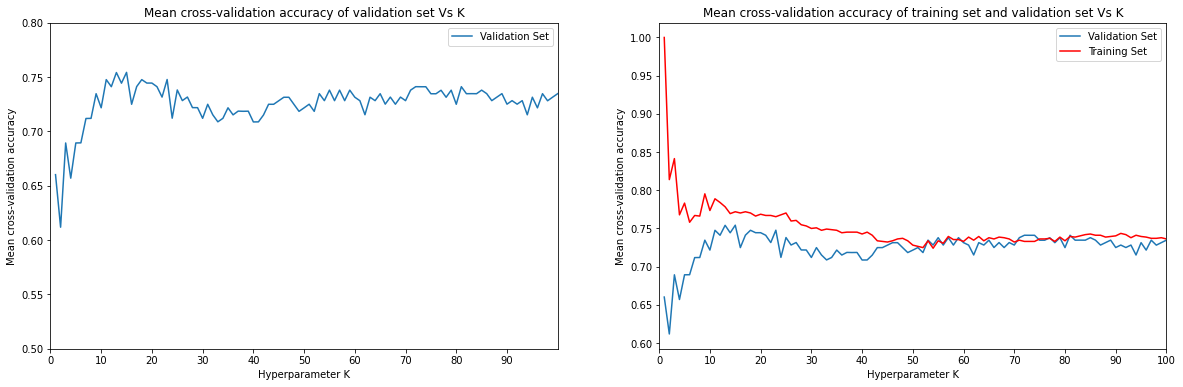

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt


# Training KNN Classifier using cross-validation while sweeping K
mean_train_accu_dict = {}
mean_valid_accu_dict = {}
for par_K in range(1,101):
  knn   = neighbors.KNeighborsClassifier(n_neighbors=par_K)
  score = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
  mean_train_accu_dict[par_K] = score['train_score'].mean()
  mean_valid_accu_dict[par_K] = score['test_score'].mean()


# Best K and highest cross-validation accuracy
best_K =  max(mean_valid_accu_dict, key=mean_valid_accu_dict.get)
max_accu = max(mean_valid_accu_dict.values())
print("Best K is", best_K)
print("The highest cross-validation accuracy is {:.2f}%".format(max_accu*100))


# Plotting mean cross-validation accuracy of validation set Vs K
fig1, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
ax1.plot(list(mean_valid_accu_dict.keys()), list(mean_valid_accu_dict.values()),
         label='Validation Set')
ax1.legend()
ax1.set_xlabel("Hyperparameter K")
ax1.set_ylabel("Mean cross-validation accuracy")
ax1.set_xlim([0, 100])
ax1.set_xticks(np.arange(0, 100, 10))
ax1.set_ylim([0.5, 0.8])
ax1.title.set_text("Mean cross-validation accuracy of validation set Vs K");

# Checking underfit and overfit ranges of K
ax2.plot(list(mean_valid_accu_dict.keys()),
         list(mean_valid_accu_dict.values()),
         label='Validation Set')
ax2.plot(list(mean_train_accu_dict.keys()), 
            list(mean_train_accu_dict.values()),
            label='Training Set', color="red")
ax2.legend()
ax2.set_xlabel("Hyperparameter K")
ax2.set_ylabel("Mean cross-validation accuracy")
ax2.set_xlim([0, 100])
ax2.set_xticks(np.arange(0, 101, 10))
# ax2.set_ylim([0.7, 1])
ax2.title.set_text("Mean cross-validation accuracy of training set and validation set Vs K");

fig1.show();

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**

  

Answer to question `State what is the number of essential features for classification and justify your answer`

---

Number of essential features required for classification is 4 (in case of non-standardized data). This is justified by the fact that with 4 features KNN-classification algorithm achieves the 'second' best mean cross-validation accuracy in the validation set as can be seen in the plot `Mean cross-validation accuracy Vs No. of features` below. The 'second' best model is choosen because with the trade off of `0.34%` accuracy our model complexity has gone from 9 features to 4 features.

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


Maximum accuracy achieved by reduction dimensionality = 76.72%
Second best maximum accuracy achieved by reduction dimensionality = 76.38%
Difference between best accuracy and second best accuracy achieved = 0.34%
Number features required for best accuracy = 9
Number features required for second best accuracy = 4
Value of K for best aacuracy with 9 featurs = 25
Value of K for best aacuracy with 4 featurs = 19
-----------------------------------------------------------------------


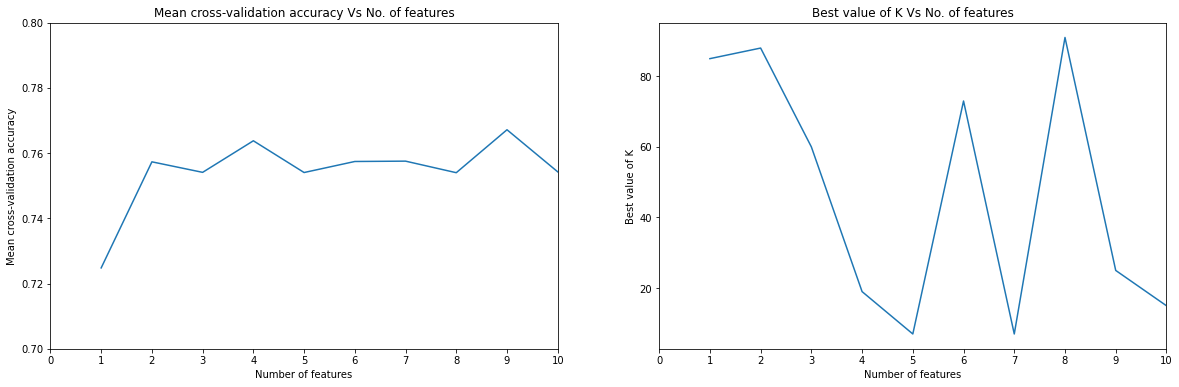

In [ ]:
from sklearn import tree, neighbors
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt


def Feature_selector (X_train , y_train , tr=0.95):

  # initializing variables used in function
  remain_features = feature_names_dataset.copy()                # initialised with all feature name
  removed_features = []                                         # intialize empty list for removed features
  mean_cross_valid_redAlgo_list = []              
  best_K_redAlgo_list = []                        

  for idx in range(len(feature_data)):
    dt = tree.DecisionTreeClassifier(random_state=0)
    dt.fit(X_train,y_train)                                     # decision tree fit
    importance = dt.feature_importances_                        # decision tree importance vector
    idx_min_importance = importance.argmin()                    # index of minimum importance feature
    temp_var1 = remain_features.pop(idx_min_importance)         # temporary storing removed feature name in variable
    removed_features.append(temp_var1)
    X_train = np.delete(X_train, idx_min_importance, axis=1)    # remove minimum important feature column
    
    temp_mean_cross_valid_score = 0
    for par_K in range(1,101):
      knn = neighbors.KNeighborsClassifier(n_neighbors=par_K)
      score = cross_validate(knn, X_train, y_train, cv=5, 
                             return_train_score=True)
      mean_cross_valid_score = score['test_score'].mean()
      if mean_cross_valid_score > temp_mean_cross_valid_score:
        temp_mean_cross_valid_score = mean_cross_valid_score
        temp_best_K = par_K

    mean_cross_valid_redAlgo_list.append(temp_mean_cross_valid_score)  # append list to store value of max mean cross-validation accuracy
    best_K_redAlgo_list.append(temp_best_K)                            # append list to store best value of K to achieve best accuracy

    if (X_train.shape[1]<=1) or (temp_mean_cross_valid_score < tr*max_accu):
      break

  return [removed_features, mean_cross_valid_redAlgo_list, best_K_redAlgo_list]


[removed_features, mean_cross_valid_reduced_list, 
 best_K_reduced_list] = Feature_selector(X_train , y_train , 0.95)    # calling Feature_selector function


# Data for plotting and validation
best_accu_full = [max_accu] + mean_cross_valid_reduced_list            # appending 'best accuracy' list with the best accuracy of knn model trained with full features
best_K_full = [best_K] + best_K_reduced_list                           # appending best K list with the best K of knn model trained with full features
plot_Xaxis = np.arange(10, 0, -1)

# Plotting mean cross-validation accuracy of validation set Vs K
fig2, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
ax1.plot(plot_Xaxis, best_accu_full)
ax1.set_xlabel("Number of features")
ax1.set_ylabel("Mean cross-validation accuracy")
ax1.set_xlim([0, 10])
ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_ylim([0.7, 0.8])
ax1.title.set_text("Mean cross-validation accuracy Vs No. of features");


# Checking underfit and overfit ranges of K
ax2.plot(plot_Xaxis, best_K_full)
ax2.set_xlabel("Number of features")
ax2.set_ylabel("Best value of K")
ax2.set_xlim([0, 10])
ax2.set_xticks(np.arange(0, 11, 1))
# ax2.set_ylim([0.7, 1])
ax2.title.set_text("Best value of K Vs No. of features");

fig2.show();


# Finding max accuracy and the number of features required for max accuracy
max_accu_achv_list_sorted = sorted(best_accu_full, reverse=False)               # Sorting maximum achieved accuracy list
max_accu_achv_list_K_values = len(best_accu_full) - np.argsort(best_accu_full)  # Corresponding number of features required to achieve the accuracy

max_accu_achv = max_accu_achv_list_sorted[-1]*100                               # best accuracy achieved
max_accu_achv_second_best = max_accu_achv_list_sorted[-2]*100                   # second best aacuracy achieved
diff_max1_max2 = abs(max_accu_achv - max_accu_achv_second_best)                 # difference between best and second best accuracy achieved
best_total_features = max_accu_achv_list_K_values[-1]                           # number of features required for best aacuracy
best_total_features_2 = max_accu_achv_list_K_values[-2]                         # number of features required for second best aacuracy

print("Maximum accuracy achieved by reduction dimensionality = {:.2f}%".format(max_accu_achv))
print("Second best maximum accuracy achieved by reduction dimensionality = {:.2f}%".format(max_accu_achv_second_best))
print("Difference between best accuracy and second best accuracy achieved = {:.2f}%".format(diff_max1_max2))
print("Number features required for best accuracy =", best_total_features)
print("Number features required for second best accuracy =", best_total_features_2)
print("Value of K for best aacuracy with 9 featurs =", best_K_full[-9])
print("Value of K for best aacuracy with 4 featurs =", best_K_full[-4])
print("-----------------------------------------------------------------------")

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization affected your model and its performance? 



Answer to question `Discuss how standardization affected your model and its performance? `

---

There is not much difference to be seen in the mean accuracy values of our knn-classifier model as the dataset 'load_diabetes' has already been standardized. 

Our standardization operation is changing only the `scaling` of our dataset without changing any relative distribution of the data-points. This scaling has changed the `Number of features` required to mode best knn-classifier from `4` to `6` features. 

*Remarks:* It can be deduced that the standardizations has increased the relative importance of some features, therefore increasing optimal number of features required for best fit knn-classifier.


Best K with full features is 13
The highest cross-validation accuracy with full features is 75.42%


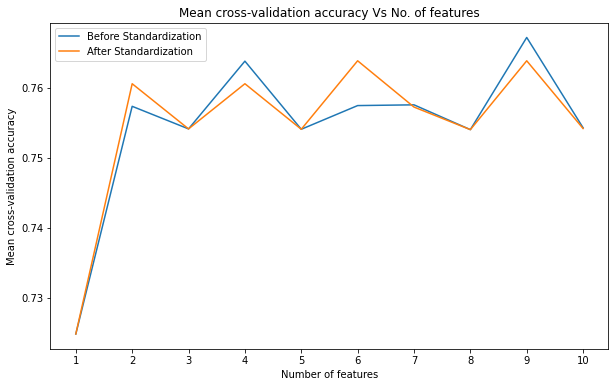

In [144]:
from sklearn.preprocessing import StandardScaler


# Standardizing the training and test data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)


# Training KNN Classifier on stardardize data using cross-validation
mean_train_accu_stdata_dict = {}
mean_valid_accu_stdata_dict = {}
for par_K in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=par_K)
  score = cross_validate(knn, X_train_scaled, y_train, cv=5, 
                         return_train_score=True)
  mean_train_accu_stdata_dict[par_K] = score['train_score'].mean()
  mean_valid_accu_stdata_dict[par_K] = score['test_score'].mean()


# Best K and highest cross-validation accuracy with all the features
best_K_stdata    = max(mean_valid_accu_stdata_dict,
                       key=mean_valid_accu_stdata_dict.get)
max_accu_stdata  = max(mean_valid_accu_stdata_dict.values())
print("Best K with full features is", best_K_stdata)
print("The highest cross-validation accuracy with full features is {:.2f}%".format(
    max_accu_stdata*100))


# Running feature selector function on standardized training data
[removed_features_stdata, mean_cross_valid_reduced_list_stdata, 
 best_K_reduced_list_stdata] = Feature_selector(X_train_scaled , y_train , 0.95)


# Plotting mean cross-validation accuracy of original and standardized data Vs k
best_accu_full = best_accu_full                                                     # original without standardization
best_aacu_full_scaled = [max_accu_stdata] + mean_cross_valid_reduced_list_stdata    # after standardization
plot_Xaxis = np.arange(10, 0, -1)


fig3, ax = plt.subplots(figsize=(10,6))
ax.plot(plot_Xaxis, best_accu_full, label='Before Standardization')
ax.plot(plot_Xaxis, best_aacu_full_scaled, label='After Standardization')
ax.legend()
ax.set_xticks(np.arange(1, 11, 1))
ax.set_xlabel("Number of features")
ax.set_ylabel("Mean cross-validation accuracy")
ax.title.set_text("Mean cross-validation accuracy Vs No. of features");
fig3.show()

Maximum accuracy achieved by reduction dimensionality = 76.38%
Second best maximum accuracy achieved by reduction dimensionality = 76.38%
Difference between best accuracy and second best accuracy achieved = 0.00%
Number features required for best accuracy = 6
Number features required for second best accuracy = 9
Value of K for best aacuracy with 6 featurs = 77
Value of K for best aacuracy with 9 featurs = 15
-----------------------------------------------------------------------


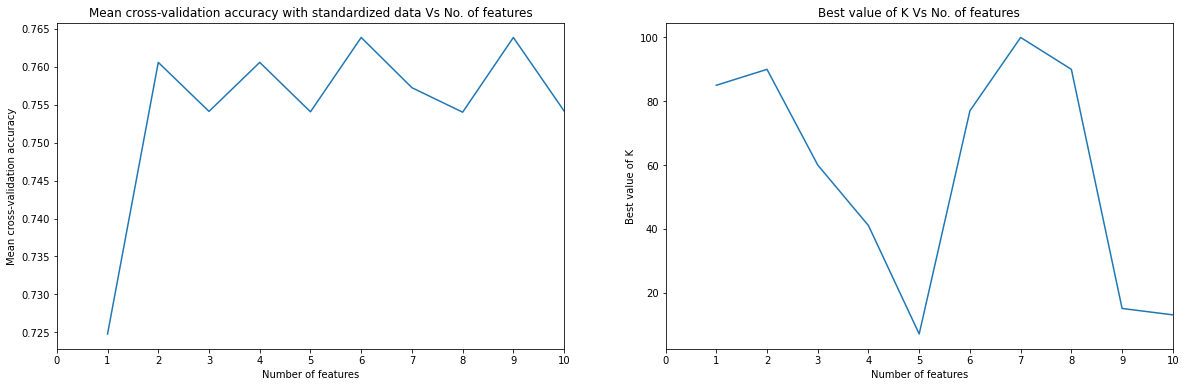

In [152]:
# Addition code block for self comparisions and validation

# Plotting mean cross-validation accuracy of validation set Vs K for stardardized data
best_accu_full = best_accu_full                                                     # original without standardization
best_aacu_full_scaled = [max_accu_stdata] + mean_cross_valid_reduced_list_stdata    # after standardization
best_K_full_scaled = [best_K_stdata] + best_K_reduced_list_stdata
plot_Xaxis = np.arange(10, 0, -1)

fig4, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
ax1.plot(plot_Xaxis, best_aacu_full_scaled)
ax1.set_xlabel("Number of features")
ax1.set_ylabel("Mean cross-validation accuracy")
ax1.set_xlim([0, 10])
ax1.set_xticks(np.arange(0, 11, 1))
ax1.title.set_text("Mean cross-validation accuracy with standardized data Vs No. of features");

ax2.plot(plot_Xaxis, best_K_full_scaled)
ax2.set_xlabel("Number of features")
ax2.set_ylabel("Best value of K")
ax2.set_xlim([0, 10])
ax2.set_xticks(np.arange(0, 11, 1))
ax2.title.set_text("Best value of K Vs No. of features");

fig4.show();


# Finding max accuracy and the number of features required for max accuracy
max_accu_achv_list_sorted = sorted(best_aacu_full_scaled, reverse=False)                      # Sorting maximum achieved accuracy list
max_accu_achv_list_K_values = len(best_aacu_full_scaled) - np.argsort(best_aacu_full_scaled)  # Corresponding number of features required to achieve the accuracy

max_accu_achv = max_accu_achv_list_sorted[-1]*100                               # best accuracy achieved
max_accu_achv_second_best = max_accu_achv_list_sorted[-2]*100                   # second best aacuracy achieved
diff_max1_max2 = abs(max_accu_achv - max_accu_achv_second_best)                 # difference between best and second best accuracy achieved
best_total_features = max_accu_achv_list_K_values[-1]                           # number of features required for best aacuracy
best_total_features_2 = max_accu_achv_list_K_values[-2]                         # number of features required for second best aacuracy

print("Maximum accuracy achieved by reduction dimensionality = {:.2f}%".format(max_accu_achv))
print("Second best maximum accuracy achieved by reduction dimensionality = {:.2f}%".format(max_accu_achv_second_best))
print("Difference between best accuracy and second best accuracy achieved = {:.2f}%".format(diff_max1_max2))
print("Number features required for best accuracy =", best_total_features)
print("Number features required for second best accuracy =", best_total_features_2)
print("Value of K for best aacuracy with 6 featurs =", best_K_full_scaled[-6])
print("Value of K for best aacuracy with 9 featurs =", best_K_full_scaled[-9])
print("-----------------------------------------------------------------------")

## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


Answers

---


1.   Best tuning paramters: `max depth = 5` and `min_sample_split = 75`
2.   Best accuracy achieved with decision tree algorithm using standardized data is `74.74%`, whereas best accuracy achieved with knn algorithm using standardized data is `76.38%`.




In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Fit Decision Tree the model to our standardized training data
model_DT = DecisionTreeClassifier()

# Define the parameters grid to search over
param_grid = {'max_depth': np.arange(2, 11, 1),
              'min_samples_split': np.arange(20, 101, 5)}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(model_DT, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format((grid_search.best_score_)*100))

Best parameters:  {'max_depth': 5, 'min_samples_split': 75}
Best score: 74.74%


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

Answers

---


Machine learning model selection:

*   KNN model is selected as machine learning algorithm. 
*   KNN hyperparameter `K=15` (best K in case of standardized data).

*   Number of features used for training the model is `9` (number of features required for best accuracy in case of standardized data).

*Remarks:* (From the results of Part:4) Model with `number of features = 9` is choosen instead of model with `number of features = 6` because in the latter case, best K required for best accuracy is `77` which is leading to underfitting problem (based on the discussion in Part:2).



**Results**:

KNN test accuracy achieved is `76.69%`


In [154]:
# Filter test data features required for best accurate model
list_features_removed = removed_features_stdata[0:1]       #best accuracy is achieved with 9 features
idx_features_removed = []

# storing indices of the least important columns removed
for i in range(len(list_features_removed)):
  idx_features_removed.append(feature_names_dataset.index(list_features_removed[i]))

# Removing least important columns from scaled test data
X_train_scaled_for_bestAccu = np.delete(X_train_scaled, idx_features_removed, axis=1)
X_test_scaled_for_bestAccu = np.delete(X_test_scaled, idx_features_removed, axis=1)

# K-Nearest Neighbours
model = neighbors.KNeighborsClassifier(n_neighbors=15)

# Fit the model to our training data
model.fit(X_train_scaled_for_bestAccu, y_train)

# Make predictions
val_predicted = model.predict(X_test_scaled_for_bestAccu)
score = 100*(1-sum(abs(val_predicted-y_test))/len(val_predicted))
print("KNN test accuracy is {:.2f}%".format(score))

KNN test accuracy is 76.69%


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/